###### CSCE 320 :: Principles of Data Science ::Texas A&M University :: Fall 2020


# Homework 4: Clustering

### 100 points [7% of your final grade]
### Due: October 21 by 11:59pm

*Goals of this homework:* There are two main objectives of this homework: (i) implement k-means from scratch, (ii)  apply k-means on a toy dataset (the iris data), and (iii) explore the clustering of text data.

*Submission instructions (Canvas):* To submit your homework, rename this notebook as `UIN_hw4.ipynb`. For example, if your UIN is `123456789`, then your homework submission would be something like `123456789_hw4.ipynb`. Submit this notebook via Canvas (looking for homework 4 under the assignment section; detailed instructions can be found [here](https://community.canvaslms.com/t5/Student-Guide/How-do-I-upload-a-file-as-an-assignment-submission-in-Canvas/ta-p/274)). Your notebook should be completely self-contained, with the results visible in the notebook. We should not have to run any code from the command line, nor should we have to run your code within the notebook (though we reserve the right to do so). So please run all the cells for us, and then submit. 

*Late submission policy:* For this homework, you may use up to three of your late days, meaning that no submissions will be accepted after October 24 at 11:59pm.

### Collaboration declarations:

You should add in all of your collaboration declarations here. 

* https://www.edureka.co/blog/arrays-in-python/
* https://stackoverflow.com/questions/9755538/how-do-i-create-a-list-of-random-numbers-without-duplicates
* https://realpython.com/python-dicts/
* https://realpython.com/python-square-root-function/
* https://www.geeksforgeeks.org/python-ways-to-create-a-dictionary-of-lists/
* https://www.datasciencecentral.com/profiles/blogs/steps-to-calculate-centroids-in-cluster-using-k-means-clustering
* https://stackoverflow.com/questions/12444716/how-do-i-set-the-figure-title-and-axes-labels-font-size-in-matplotlib
* https://stackoverflow.com/questions/49806790/iterable-over-raw-text-documents-expected-string-object-received
* Piazza for reference

*Recall our homework collaboration policy: Your homework is yours alone and you are expected to complete each homework independently. Your solution should be written by you without the direct aid or help of anyone else. However, we believe that collaboration and team work are important for facilitating learning, so we encourage you to discuss problems and general problem approaches (but not actual solutions) with your classmates. If you do have a chat with another student about a homework problem, you must inform us by writing a note on your homework submission (e.g., Bob pointed me to the relevant section for problem 3). The basic rule is that no student should explicitly share a solution with another student (and thereby circumvent the basic learning process), but it is okay to share general approaches, directions, and so on. If you feel like you have an issue that needs clarification, feel free to contact either me or the TA.*

## (30 points) Part 1: Implement k-means
  
For the first part of this assignment, you are going to implement k-means from (almost) scratch, which means you can only use [The Python Standard Library](https://docs.python.org/3/library/). 
We have predefined some helper functions for the ease of implementation and grading. However, you should always keep the main function's structure in mind while implementing those helper functions.

In [1]:
# Within the scope of The Python Standard Library, import all packages you need for the implementation of k-means
### your imports here ###
import random
import math

**Helper Function 1:** Initialize Centroids  
To start with, you need to pick k initial centroids from the data.

In [2]:
def initializeCentroids(datapoints, k):
    length = len(datapoints)
    index = random.sample(range(length), k)
    centroids = []
    for i in range(k):
        centroids.append(datapoints[index[i]])
    return centroids

In [3]:
# optional: you may fake some simple data to test your implementation of initializeCentroids here
### your code here ###
data = [[1, 2], [3, 4], [5, 6], [7, 8], [9, 10]]
initializeCentroids(data, 2)

[[7, 8], [3, 4]]

**Helper Function 2:** Termination Condition  
Next, you should determine the termination condition for the loop. This function should return True or False if k-means is done. K-means terminates either because it has run a maximum number of iterations OR the centroids stop changing (your implementation should handle both cases).

In [111]:
def termination(oldCentroids, centroids, iterations, max_iterations):
    centroids = sorted(centroids)
    if oldCentroids != None:
        oldCentroids = sorted(oldCentroids)
    if iterations >= max_iterations or centroids == oldCentroids:
        return True
    else:
        return False       

In [112]:
# optional: you may fake some simple data to test your implementation of termination here
# TEST 1:
cent = [[1, 2], [3, 4], [5, 6], [7, 8], [9, 10]]
cent2 = [[1, 2], [3, 4], [5, 6], [7, 8], [9, 9]]
print(termination(cent, cent2, 10, 10))

# TEST 2:
cent = [[1, 2], [3, 4], [5, 6], [7, 8], [9, 10]]
cent2 = [[1, 2], [3, 4], [5, 6], [7, 8], [9, 9]]
print(termination(cent, cent2, 9, 10))

# TEST 3:
cent = [[1, 2], [3, 4], [5, 6], [7, 8], [9, 10]]
cent2 = [[1, 2], [3, 4], [5, 6], [7, 8], [9, 10]]
print(termination(cent, cent2, 9, 10))

# TEST 4:
cent = [[1, 2], [3, 4], [5, 6], [9, 10], [7, 8]]
cent2 = [[1, 2], [3, 4], [5, 6], [7, 8], [9, 10]]
print(termination(cent, cent2, 9, 10))

True
False
True
True


**Helper Function 3:** Assign Cluster  
Now, you can place each datapoint in the cluster whose current centroid is nearest.

In [113]:
def assignCluster(datapoints, centroids):
    clusters = {} # dictionary
    index = 0
    for i in datapoints:
        dist = []
        for j in centroids:
            euc_dist = 0
            for k in range(len(j)): # the dimensions of each array (2D will be 2)
                euc_dist += (i[k]-j[k])**2
            euc_dist = math.sqrt(euc_dist)
            dist.append(euc_dist)
        min_index_euc_dist = dist.index(min(dist)) # the index where the min will be
        temp_lst  = []
        temp_lst.append(i)
        temp_lst.append(centroids[min_index_euc_dist])
        # first element = datapoint, second element = centroid
        
        clusters[index] = temp_lst
        index += 1
    
    return clusters

In [114]:
# optional: you may fake some simple data to test your implementation of assignCluster here
# TEST 1:
data = [[1, 2], [3, 4], [5, 6], [9, 10], [7, 8]]
cent = initializeCentroids(data, 2)
print("Centroids:", cent)
print(assignCluster(datapoints = data, centroids = cent))
print()

# TEST 2:
data = [[1, 2], [3, 4.5], [5, 6], [9, 10], [7, 8]]
cent = initializeCentroids(data, 3)
print("Centroids:", cent)
print(assignCluster(datapoints = data, centroids = cent))
print()

Centroids: [[5, 6], [9, 10]]
{0: [[1, 2], [5, 6]], 1: [[3, 4], [5, 6]], 2: [[5, 6], [5, 6]], 3: [[9, 10], [9, 10]], 4: [[7, 8], [5, 6]]}

Centroids: [[3, 4.5], [7, 8], [1, 2]]
{0: [[1, 2], [1, 2]], 1: [[3, 4.5], [3, 4.5]], 2: [[5, 6], [3, 4.5]], 3: [[9, 10], [7, 8]], 4: [[7, 8], [7, 8]]}



**Helper Function 4:** Calculate Centroids  
Finally, the last helper function that calculates the new centroid of each cluster.

In [129]:
def calculateCentroids(clusters):
    clusters_copy = clusters.copy()
    centroids = []
    counter = len(clusters_copy)
    
    while(counter != 0 and len(clusters_copy)>=0):
        mean = []
        index = []
        mean_point = []
        first_i = list(clusters_copy.keys())[0]
        init_centroid = clusters_copy[first_i][1]
        
        # finding all the values of the cluster put into list - mean
        for i in clusters_copy:
            datapoint = clusters_copy[i][0]
            centroid  = clusters_copy[i][1]
            if (centroid == init_centroid):
                mean.append(datapoint)
                index.append(i)
                counter -= 1 # decrement counter
        
        # calculate mean
        for i in range(len(mean[0])): # the dimensions of each array (2D will be 2)
            sum_value = 0
            count_value = 0
            
            for j in mean:
                sum_value += j[i]
                count_value+= 1
            mean_value = sum_value/count_value
            mean_point.append(mean_value)  
        centroids.append(mean_point)
       
        # deleting from the dictionary where we already calcualte
        for i in index:
            clusters_copy.pop(i)
            
    return centroids

In [130]:
# optional: you may fake some simple data to test your implementation of calculateCentroids here
data = [[1, 2], [3, 4], [5, 6], [9, 10], [7, 8]]
cent = initializeCentroids(data, 3)
print("Centroids:", cent)
print()
clus = assignCluster(datapoints = data, centroids = cent)
print(clus)
print()
calculateCentroids(clus)

Centroids: [[3, 4], [9, 10], [7, 8]]

{0: [[1, 2], [3, 4]], 1: [[3, 4], [3, 4]], 2: [[5, 6], [3, 4]], 3: [[9, 10], [9, 10]], 4: [[7, 8], [7, 8]]}



[[3.0, 4.0], [9.0, 10.0], [7.0, 8.0]]

**Main Function**  
It's time to wrap everything up! This function takes datapoints, k, and max_iteration as input; and it returns **a list of length k in which each element is a cluster of datapoints** and **a list of k centroids**. Also, you may want to **preserve the corresponding order of these two lists for the ease of implementation in part 2**.

In [120]:
def kmeans(datapoints, k, max_iteration):
    # initialization
    iterations=0
    oldCentroids = None
    centroids = initializeCentroids(datapoints, k)
    
    # Run the main k-means algorithm
    while not termination(oldCentroids, centroids, iterations, max_iteration):
        # Update recordings
        oldCentroids = centroids
        iterations += 1
        
        # Assign clusters based on centroids
        clusters = assignCluster(datapoints, centroids)
        
        # Update centroids
        centroids = calculateCentroids(clusters)
        
    return clusters, centroids

## (30 points) Part 2: Clustering Irises
For part 2 of this assignment, let's apply the k-means clustering function for plant taxonomy. Specifically, we will try to cluster some irises based on their sepal's and petal's length and width.  

**For this part, you will need to:**
1. Apply the k-means clustering function you just implemented on the iris data with k=1,2,3,...,9,10;
2. Calculate the average distance to centroid for each k;
3. Plot the k vs. average distance to centroid graph to pick the best value of k.

In [121]:
import pandas as pd

datapoints = pd.read_csv('Iris.tsv',sep='\t')
print(datapoints.head())

   sepal_length  sepal_width   petal_length   petal_width
0           5.1          3.5            1.4           0.2
1           4.9          3.0            1.4           0.2
2           4.7          3.2            1.3           0.2
3           4.6          3.1            1.5           0.2
4           5.0          3.6            1.4           0.2


1
2
3
4
5
6
7
8
9
10
[1.9430341590370253, 0.8560279682448627, 0.6489747979610452, 0.5585746563385615, 0.5202315059157019, 0.4983310606817352, 0.4579544924203815, 0.44161792074636563, 0.42200038762802156, 0.3897829201926212]


Text(0, 0.5, 'Average Distance to centroid')

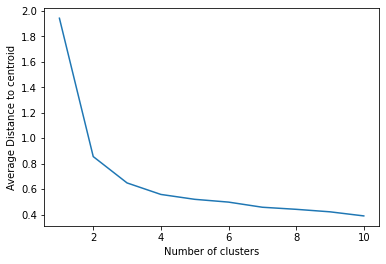

In [173]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import math

data = []
for row in datapoints.index:
    data.append(datapoints.iloc[row].values.tolist())

number_clusters = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
aver_dist_list = []
# -----------------------------------------------------------------
# finding average distance to centroids
for i in range(1, 11):
    print(i)
    clusters , centroids = kmeans(data, i, 10000)
    total_dist = 0
    total_number = len(clusters)
    for j in clusters:
        euc_dist = 0
        for k in range(4):
            euc_dist += (clusters[j][0][k] - clusters[j][1][k]) ** 2
        euc_dist = math.sqrt(euc_dist)
        total_dist += euc_dist
    aver_dist = total_dist/total_number
    aver_dist_list.append(aver_dist)

# -----------------------------------------------------------------
# ploting k vs 
print(aver_dist_list)
plt.plot(number_clusters, aver_dist_list)
plt.xlabel('Number of clusters')
plt.ylabel('Average Distance to centroid')


**What is the best value of k according to your graph?**  
In the plot above, the elbow is at k=3. This indicates that the optimal k for this dataset is 3, since more would be overfitting the data. 

## (40 points) Part 3: Clustering Text Data
For the 3rd part of this assignment, you will explore the clustering of text data. The good news: for this part, you can use scikit-learn!

Let's take a look at the data:

In [174]:
import pandas as pd

df = pd.read_csv('product_reviews.tsv',sep='\t')
print('Preview:')
print(df.head())
print('\nShape:')
print(df.shape)
print('\nValue Counts:')
print(df['product_type'].value_counts())

Preview:
      product_type                                     review_content
0  Washing_Machine  Electrolux's Editors' Choice award-winning $1,...
1  Washing_Machine  GE's $699 GTW685BSLWS top-load washing machine...
2  Washing_Machine  Samsung's $1,899 WV9900 FlexWash is actually t...
3  Washing_Machine  The $650 GE GTW485ASJWS might be one of the si...
4  Washing_Machine  This $1,200 top-load washing machine seemingly...

Shape:
(7758, 2)

Value Counts:
Phone              1212
Laptop             1069
Camera              834
TV                  794
Headphone           653
Speaker             551
Printer             359
Networking          355
Tablet              282
Monitor             258
Blu-Ray_Player      229
Desktop             216
Video_Camera        206
AV_Receiver         149
Small_Appliance     114
Wearable            107
Media_Streamers      91
Oven                 53
Coffee_Maker         49
Refrigerator         49
Vacuum_Cleaner       45
Washing_Machine      38
Dryer     

The dataset contains 7758 product review articles of 25 different types of products. **The goal for this part is to derive a fixed smaller amount of supergroups (say 5~10 clusters; pick your favorite number!) with different clustering algorithms based on the content of reviews of 25 different types of products.**  
Before feeding the clustering functions, you need to transform the data a little bit so that the clustering functions can digest the review articles.  

First, you should represent each review as a vector, where element i of the vector corresponds to the count of word i in that product review. This is the classic [bag-of-words](https://en.wikipedia.org/wiki/Bag-of-words_model) model. Besides that, you also need to use lower case text, do tokenization, remove punctuations, remove [stop words](https://en.wikipedia.org/wiki/Stop_word), use [n-gram](https://en.wikipedia.org/wiki/N-gram) tokens, etc. for better results.   
Now, let's implement all those things.

In [ ]:
### don't actually add any code here ... keep reading ... ###

**<span style="color:red">Wait a minute!</span> sklearn can do it for your in one line : )**  
Take a look at [sklearn.feature_extraction.text.CountVectorizer](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html) and apply it to our corpus below. Alternatively, you can opt to implement all those things in the block above with **NO** extra credits :P  
**CountVectorizer has a lot of parameters; set them wisely.**

In [214]:
from sklearn.feature_extraction.text import CountVectorizer

df2 = df.iloc[:,1]

# Testing
corpus = df2.iloc[0]
corpus = [corpus]
# print(corpus)
vectorizer = CountVectorizer(stop_words='english', strip_accents='unicode', analyzer='word')
X = vectorizer.fit_transform(corpus)
#print(vectorizer.get_feature_names())
#print(X.toarray())

# actual

word_names = []
word_count = []
corpus = []
for row in df2.index:
    review = df2.iloc[row]
    corpus.append(review)
vectorizer = CountVectorizer(stop_words='english', strip_accents='unicode', analyzer='word')
X = vectorizer.fit_transform(corpus)
word_names.append(vectorizer.get_feature_names())
word_count.append(X.toarray())



7758


Rather than simply consider word counts as the representation of reviews (as we do in CountVectorizer), we can also consider alternative weightings of the words in our vector representation of each review. One of the classic approaches is [TF-IDF](https://en.wikipedia.org/wiki/Tf–idf), which weighs a term in a document highly if it is popular within the document (term frequency) and also rare across all documents (inverse document frequency). Take a look at [sklearn.feature_extraction.text.TfidfVectorizer](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) and apply it to our corpus below.

In [217]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

# Testing
corpus = df2.iloc[0]
corpus = [corpus]
vectorizer = TfidfVectorizer(stop_words='english', strip_accents='unicode', analyzer='word')
X3 = vectorizer.fit_transform(corpus)
#print(vectorizer.get_feature_names())
#print(X.toarray())

# Actual
word_names_TFIDF = []
word_count_TFIDF = []
corpus = []
for row in df2.index:
    review = df2.iloc[row]
    corpus.append(review)
vectorizer = TfidfVectorizer(stop_words='english', strip_accents='unicode', analyzer='word')
X4 = vectorizer.fit_transform(corpus)
word_names_TFIDF.append(vectorizer.get_feature_names())
word_count_TFIDF.append(X.toarray())


Now, it's time to do clustering! In the following sections, apply k-means and another clustering algorithm of your choice (within the scope of [sklearn.cluster](https://scikit-learn.org/stable/modules/clustering.html)) to the product review corpus. Try both count vectors and tf-idf vectors, and record:
- Cluster Composition by Count: for each cluster, count the amount of reviews by product_type;
- Cluster Composition by Percentage: for each product_type, calculate its reviews' distribution (in percentage) across clusters.

Recall that you need to pick a number between 5 and 10 as your target amount of supergroups.

In [229]:
from sklearn import cluster
from sklearn.cluster import KMeans

# will choose 7
kmeans = KMeans(n_clusters=7, random_state=0, max_iter = 1000)
y_kmeans = kmeans.fit_predict(X)
print(y_kmeans)

# I do not know to proceed, the next few steps
# I also do not have the time, my bad. 

[3 3 3 ... 6 3 6]


You may use the following table or use plots to illustrate your experiment results:  

|  Model  | Vector | Cluster Composition by Count | Cluster Composition by Percentage |
|:-------:|:------:|:----------------------------:|:---------------------------------:|
| k-means |  count |            `TODO`            |               `TODO`              |
| k-means | tf-idf |            `TODO`            |               `TODO`              |
|  `TODO` |  count |            `TODO`            |               `TODO`              |
|  `TODO` | tf-idf |            `TODO`            |               `TODO`              |

Analyze your experiment results and add a brief discussion here on:
- which setting yields better clusters (supergroups)?
- what're your justifications for your answer of the above question?
- any other observations?

`TODO`